# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import the dataset 

In [2]:
df=pd.read_csv('fifaindex_21.csv')

## Dataset details

In [3]:
df.shape

(18000, 42)

In [4]:
df.head()

,Name,Age,Value €,Value $,Value £,Wage €,Wage $,Wage £,Ball Control,Dribbling,...,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
0,Manuel Neuer,35,20500000.0,23000000.0,18500000.0,135000.0,150000.0,120000.0,46,30,...,16,14,11,47,11,88,88,88,91,89
1,Lionel Messi,33,103500000.0,117000000.0,93000000.0,560000.0,630000.0,500000.0,96,96,...,94,93,94,75,88,14,6,11,15,8
2,Jan Oblak,28,120000000.0,135500000.0,108000000.0,125000.0,140000.0,110000.0,30,12,...,12,13,14,11,13,90,87,92,78,90
3,Kalidou Koulibaly,29,76500000.0,86500000.0,69000000.0,140000.0,155000.0,125000.0,74,69,...,15,28,28,33,14,13,7,11,7,5
4,N'Golo Kanté,30,78000000.0,88000000.0,70000000.0,190000.0,215000.0,170000.0,80,79,...,65,49,49,54,56,7,15,12,10,10


In [5]:
df.tail()

,Name,Age,Value €,Value $,Value £,Wage €,Wage $,Wage £,Ball Control,Dribbling,...,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
17995,Hazza Al Ghamdi,20,250000.0,275000.0,220000.0,2000.0,2300.0,1800.0,56,54,...,57,47,42,40,37,9,14,8,9,13
17996,Gustavo Nnachi,19,250000.0,275000.0,220000.0,1500.0,1600.0,1300.0,56,53,...,39,41,35,44,40,12,10,14,7,6
17997,Imam Jagne,17,325000.0,375000.0,300000.0,1500.0,1600.0,1300.0,48,55,...,35,42,40,55,42,9,6,10,10,14
17998,Kwadwo Opoku,19,230000.0,275000.0,210000.0,1500.0,1600.0,1300.0,57,56,...,48,49,33,63,43,9,8,13,14,12
17999,Bénie Traore,18,250000.0,275000.0,220000.0,1500.0,1600.0,1300.0,64,62,...,42,35,34,49,37,10,10,12,7,9


# Step 1 : Exploratory Data Analysis and Preprocessing

In [6]:
print('The DataFrame contains {} lines and {} columns. The number of lines corresponds to the number of players and 38 is the number of features'.format(df.shape[0],df.shape[1]))

The DataFrame contains 18000 lines and 42 columns. The number of lines corresponds to the number of players and 38 is the number of features


In [7]:
df=df.drop(['Value $', 'Value £','Wage $','Wage £'],axis=1)

In [8]:
df.columns

Index(['Name', 'Age', 'Value €', 'Wage €', 'Ball Control', 'Dribbling',
       'Marking', 'Slide Tackle', 'Stand Tackle', 'Aggression', 'Reactions',
       'Att. Position', 'Interceptions', 'Vision', 'Composure', 'Crossing',
       'Short Pass', 'Long pass', 'Acceleration', 'Stamina', 'Strength',
       'Balance', 'Sprint Speed', 'Agility', 'Jumping', 'Heading',
       'Shot Power', 'Finishing', 'Long Shots', 'Curve', 'FK Acc.',
       'Penalties', 'Volleys', 'GK Positioning', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Reflexes'],
      dtype='object')

### Variable prensentation
Here are all the columns of the DataSet by category. For each feature except the player description, they have a rate over 100:  

1 . Player description :  

<li>Age                  
<li>Market Value  
<li>Salary 
<br>  
    
2 . Technical skills
<li>Ball control
<li>Dribbling 
<br>
    
3 . Defense : 
<li>Man to Man marking
<li>Slinding tackle 
<li>Standing tackle 
<br>
    
4 . Aptitude : 
<li>Commitment
<li>Responsiveness 
<li>Placem. off. 
<li>Intercept
<li>Vista  
<li>Discipline  
<br>
    
5 . Passes : 
<li>Cross
<li>Short pass 
<li>Long pass
<br>

6 . Physic : 
<li>Pace
<li>Endurance  
<li>Strength 
<li>Balance
<li>Speed 
<li>Agility  
<li>Vertical jump  
<br>
    
7 . Shots : 
<li>Header
<li>Shot strength  
<li>Finishing  
<li>Long shots  
<li>Effect  
<li>Precision Free kick
<li>Penalties  
<li>Volley  
<br>

8 . GoalKeeper Abilities : 
<li>Placement
<li>Dive  
<li>Hand play 
<li>Kick play  
<li>Reflexes  

<br>
    

##### We only have numeric values and string for the name of the player

In [9]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)


##### Here is the statitical description of the features

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,18000.0,2.592617e+01,4.670134e+00,17.0,22.0,25.0,29.0,54.0
Value €,17752.0,3.051957e+06,7.805119e+06,1000.0,550000.0,1100000.0,2200000.0,185500000.0
Wage €,17752.0,9.928453e+03,1.966201e+04,1500.0,1800.0,3700.0,9700.0,560000.0
Ball Control,18000.0,5.970844e+01,1.607416e+01,5.0,57.0,64.0,69.0,96.0
Dribbling,18000.0,5.679300e+01,1.838916e+01,4.0,52.0,62.0,68.0,96.0
Marking,18000.0,4.764389e+01,2.010519e+01,3.0,30.0,54.0,64.0,93.0
Slide Tackle,18000.0,4.657589e+01,2.088525e+01,6.0,26.0,54.0,64.0,91.0
Stand Tackle,18000.0,4.878433e+01,2.129095e+01,5.0,29.0,57.0,66.0,93.0
Aggression,18000.0,5.673267e+01,1.689690e+01,9.0,46.0,60.0,69.0,96.0
Reactions,18000.0,6.256672e+01,8.425216e+00,30.0,57.0,62.0,68.0,95.0


#####  In this dataset, we have 248 players for who a market value and a salary are missing, so we are going to use them to test our models

In [11]:
df[df["Value €"].isnull()].head()

,Name,Age,Value €,Wage €,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,...,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
294,Rosberto Dourado,21,NaN,NaN,76,77,83,80,86,75,...,59,54,57,77,57,10,15,14,14,9
364,Egidio Maestre Schetino,29,NaN,NaN,72,56,84,76,83,86,...,41,45,49,56,44,12,16,12,13,17
371,Mauro Evidio Nérez,33,NaN,NaN,78,77,77,76,77,69,...,53,83,52,61,47,7,16,15,15,7
372,Jorge Ezequiel Serendero,33,NaN,NaN,21,9,12,13,17,34,...,7,9,18,14,8,80,78,81,77,77
375,Jaime Nicolás Frendado,37,NaN,NaN,64,60,83,82,82,86,...,61,72,58,62,63,17,14,15,15,19


In [12]:
df.isna().sum()

Name                0
Age                 0
Value €           248
Wage €            248
Ball Control        0
Dribbling           0
Marking             0
Slide Tackle        0
Stand Tackle        0
Aggression          0
Reactions           0
Att. Position       0
Interceptions       0
Vision              0
Composure           0
Crossing            0
Short Pass          0
Long pass           0
Acceleration        0
Stamina             0
Strength            0
Balance             0
Sprint Speed        0
Agility             0
Jumping             0
Heading             0
Shot Power          0
Finishing           0
Long Shots          0
Curve               0
FK Acc.             0
Penalties           0
Volleys             0
GK Positioning      0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Reflexes         0
dtype: int64

We put all the players without price in a dataset that we won't use for training and drop these rows from the actual dataframe

In [13]:
test_set=df[df["Value €"].isnull()]
test_set.shape

(248, 38)

In [14]:
df=df.dropna()
df.shape

(17752, 38)

We are going to see the correlations of the features to the target

In [15]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Value €'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Value €,1.000000
Wage €,0.809896
Reactions,0.513436
Composure,0.391616
Vision,0.321351
Shot Power,0.296962
Short Pass,0.292146
Long pass,0.273418
Ball Control,0.262607
Curve,0.243051


Features that are correlated to the value are reaction, composure (self control), vision

Below we see that 17778 over 18000 have unique name.  
So 222 people have same names

In [16]:
len(df['Name'].unique())

17532

For example here Ben Davies is the name and first name of 2 different players

In [17]:
df[df['Name']=='Ben Davies']

,Name,Age,Value €,Wage €,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,...,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
591,Ben Davies,27,17000000.0,80000.0,78,75,78,80,81,76,...,52,72,48,54,48,7,11,7,6,14
2855,Ben Davies,25,4400000.0,45000.0,66,60,79,72,74,65,...,39,44,40,48,43,15,6,15,10,6


### Here we visualize players who have duplicated name in the dataframe and who worth more than 4 million euros

In [18]:
df_players_same_name=df[df['Name'].duplicated()==True]

In [19]:
df_players_same_name.shape

(220, 38)

In [20]:
df_players_same_name[df_players_same_name['Value €']>4000000]

,Name,Age,Value €,Wage €,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,...,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
768,Emerson,26,17000000.0,70000.0,80,79,77,76,77,69,...,77,53,71,55,51,7,8,15,8,14
791,Gabriel,27,16500000.0,15500.0,82,81,76,73,77,87,...,80,74,73,67,67,15,12,8,14,15
851,Marcelo,33,6500000.0,55000.0,63,49,76,72,81,85,...,30,46,41,51,37,7,16,15,10,14
980,Otávio,26,11500000.0,29500.0,74,71,78,73,79,78,...,62,47,49,48,49,12,8,10,15,9
1201,Joaquín,24,14000000.0,15500.0,69,60,75,77,79,80,...,46,49,49,47,39,14,9,12,13,14
1311,Lisandro López,31,6000000.0,16000.0,62,59,77,76,78,77,...,44,37,32,46,52,6,14,12,8,13
1398,Gabriel,28,6500000.0,13000.0,23,20,16,13,19,28,...,19,12,12,22,10,75,78,73,68,79
1731,Danilo,29,5000000.0,17500.0,74,74,73,75,76,74,...,67,62,49,42,53,10,10,11,15,12
2010,Paulinho,20,9000000.0,25500.0,80,81,29,32,37,45,...,65,73,55,58,58,15,13,13,10,12
2028,Rodrigo,28,4100000.0,14000.0,73,75,69,71,71,65,...,71,72,68,67,44,8,12,14,9,13


## Create variables

**Class player**

<br>
    
<li>If the player has 5 times more than 90 rating : he is a world class player. Encoder = 5
<li>If he has 5 times more than 85 rating : he is a very good player. Encoder = 4
<li>If he has 5 times more than 80 rating : he is a good player. Encoder = 3
<li>If he has 5 times more than 75 rating : he is a normal player. Encoder = 2
<li>If he has 5 times more than 70 rating : he is a basic player. Encoder = 1
<li>If he has 5 times more than 60 rating : he is a district player. Encoder = 0

In [21]:
def count_values_in_row(df,rating):
    return (df.iloc[:,3:] > rating).sum(axis=1)>=5

In [22]:
df.loc[count_values_in_row(df,0),'class_player'] = 0
df.loc[count_values_in_row(df,70),'class_player'] = 1
df.loc[count_values_in_row(df,75),'class_player'] = 2
df.loc[count_values_in_row(df,80),'class_player'] = 3
df.loc[count_values_in_row(df,85),'class_player'] = 4
df.loc[count_values_in_row(df,90),'class_player'] = 5

Players according to the class they belong

In [23]:
df[['Name','class_player']].head(15) # Here are some player and the class they belong to

,Name,class_player
0,Manuel Neuer,4.0
1,Lionel Messi,5.0
2,Jan Oblak,4.0
3,Kalidou Koulibaly,4.0
4,N'Golo Kanté,5.0
5,Alisson,4.0
6,Toni Kroos,4.0
7,Erling Haaland,5.0
8,Keylor Navas,4.0
9,Bruno Fernandes,5.0


In [24]:
df['class_player'].value_counts()

0.0    8115
1.0    5285
2.0    3039
3.0    1045
4.0     237
5.0      31
Name: class_player, dtype: int64

**Class age** : 
<li> If the player is or younger than 21, he is a Junior.  Encoder = 0
<li> If the player is between 21 and 25, he is a player who is developping.  Encoder = 1
<li> If the player is between 25 and 30, he is an experimented player.  Encoder = 2
<li> If the player is or older than 30, he is a Senior.  Encoder = 3

In [25]:
df['class_age'] = df['Age'].apply(lambda x : 0 if x <=21 else( 1 if x <=25 else (2 if x<=30 else 3 )))

## Explore the dataframe

### The value of the player according to the level class player

<br>
    
<li>If the player has 5 times more than 90 rating : he is a world class player. <strong>Encoder = 5</strong>
<li>If he has 5 times more than 85 rating : he is a very good player. <strong>Encoder = 4</strong>
<li>If he has 5 times more than 80 rating : he is a good player. <strong>Encoder = 3</strong>
<li>If he has 5 times more than 75 rating : he is a normal player. <strong>Encoder = 2</strong>
<li>If he has 5 times more than 70 rating : he is a basic player. <strong>Encoder = 1</strong>
<li>If he has 5 times more than 70 rating : he is a district player. <strong>Encoder = 0</strong>

<ipython-input-26-391372678c71>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


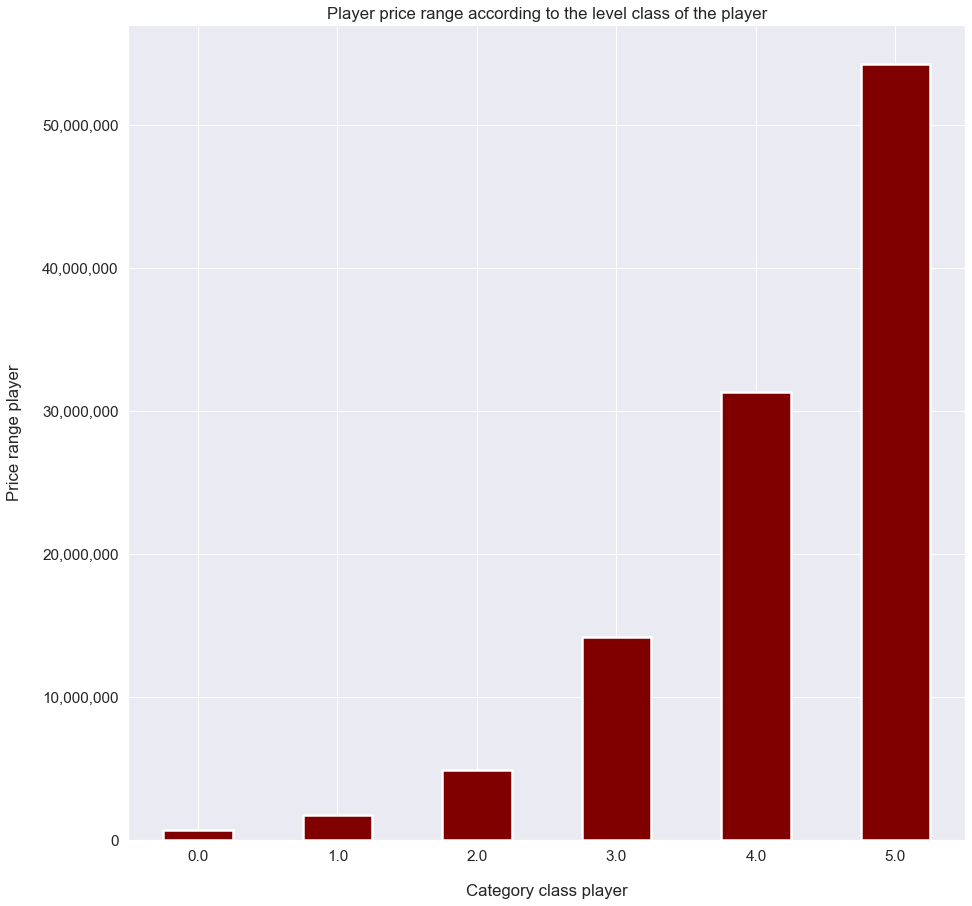

In [26]:
sns.set(font_scale=1.4)
ax= df.groupby('class_player').mean()['Value €'].plot(kind='bar',grid=True,figsize=(15,15), linewidth=2.5, color='maroon')
plt.xlabel('Category class player', labelpad=20)
plt.xticks(rotation=0)
plt.ylabel('Price range player', labelpad=20)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.title('Player price range according to the level class of the player')
plt.show()

Players market value rise following their class we see that class 5 players cost on average 50 million euros whereas 4 class players cost around 30 million euros

We can see that the level class of a player has a big impact on his market value. The relation ship is linear.  
Distict and basic players (class 0 & 1) have a market value too low to be visible on the plot

### The value of the player according to the age class player

<br>
    
<li> If the player is or is younger than 21, he is a Junior.  <strong>Encoder = 0</strong> 
<li> If the player is between 21 and 25, he is a player who is developping.  <strong>Encoder = 1</strong>
<li> If the player is between 25 and 30, he is an experimented player.  <strong>Encoder = 2</strong>
<li> If the player is or is older than 30, he is a Senior.  <strong>Encoder = 3</strong>

<ipython-input-27-80c447a633d2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


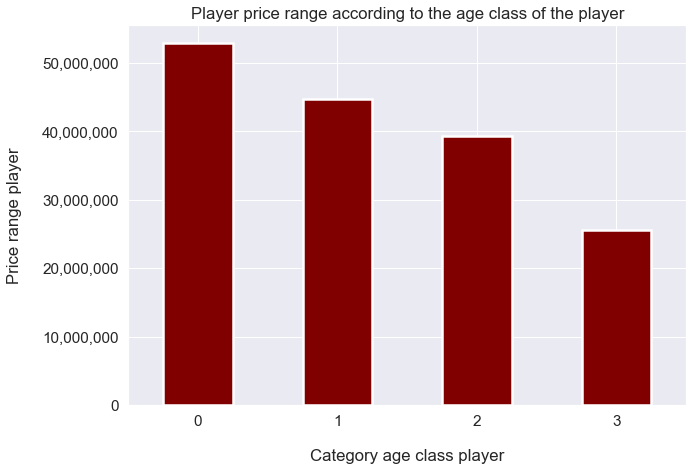

In [27]:
df_viz1=df.head(500) #We take the first 5000 players because here we have a lot of players who are not that competitive
sns.set(font_scale=1.4)
ax= df_viz1.groupby('class_age').mean()['Value €'].plot(kind='bar',grid=True,figsize=(10,7), linewidth=2.5, color='maroon')
plt.xlabel('Category age class player', labelpad=20)
plt.xticks(rotation=0)
plt.ylabel('Price range player', labelpad=20)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.title('Player price range according to the age class of the player')
plt.show()

<li>We have to higlight that players used for this visualisation are a part of the top 500 players in the world.
<li>On average players under 25 years old are the more expensive with a mean price around 45 million euros.  
<li>Whereas players over 25 years old are a little bit less expensive with a mean price around 30 million euros.  


### The value of the player according to his wage

<ipython-input-28-d3fc60917d98>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


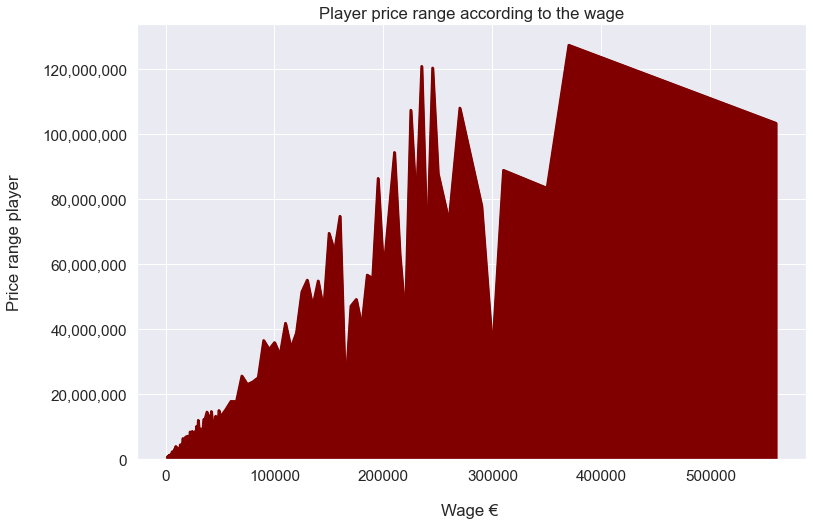

In [28]:
sns.set(font_scale=1.4)
ax= df.groupby('Wage €').mean()['Value €'].plot(kind='area',grid=True,figsize=(12,8), linewidth=2.5, color='maroon')
plt.xlabel('Wage € ', labelpad=20)
plt.xticks(rotation=0)
plt.ylabel('Price range player', labelpad=20)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.title('Player price range according to the wage')
plt.show()

## Let's see the ranking of the 20 most expensive players

In [29]:
df1Corr=pd.DataFrame((df[['Name','Value €']].sort_values(ascending=False,by='Value €'))).head(20)
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Name,Value €
26,Kylian Mbappé,185500000.000000
17,Neymar Jr,132000000.000000
29,Kevin De Bruyne,127500000.000000
15,Robert Lewandowski,124500000.000000
12,Harry Kane,123000000.000000
7,Erling Haaland,122500000.000000
9,Bruno Fernandes,121000000.000000
23,Mohamed Salah,120500000.000000
2,Jan Oblak,120000000.000000
28,Virgil van Dijk,113000000.000000


Mbappe and Neymar are the 2 most expensive players followed by De Bruyne

In [30]:
df1Corr=pd.DataFrame((df[['Name','Value €']].sort_values(ascending=True,by='Value €'))).head(20)
df1Corr.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,Name,Value €
4668,Cristian Lucchetti,1000.000000
250,Gianluigi Buffon,1000.000000
12182,Jean-François Gillet,1000.000000
17230,Hitoshi Shiota,4000.000000
17660,Kyriakos Stamatopoulos,4000.000000
16383,Nobuyuki Abe,5000.000000
16853,Vincent Planté,5000.000000
16843,Simone Farelli,5000.000000
16838,Han Feng,5000.000000
16328,Sam Russell,6000.000000


The less expensive player in the world is Gianluigi Buffon, which seems to be shocking but realistic because he is 43

In [31]:
viz1=df.drop(['Age','Name','Wage €','Value €','class_player','class_age'],axis=1)


In [32]:
viz1['best_attribute']=viz1.idxmax(axis=1)
viz1['Name']=df.Name
viz1['Value €']=df['Value €']
viz1['Age']=df.Age

In [33]:
df1Corr=pd.DataFrame((viz1[['Name','Value €','best_attribute']].sort_values(ascending=False,by='Value €'))).head(20)
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Name,Value €,best_attribute
26,Kylian Mbappé,185500000.000000,Acceleration
17,Neymar Jr,132000000.000000,Agility
29,Kevin De Bruyne,127500000.000000,Vision
15,Robert Lewandowski,124500000.000000,Att. Position
12,Harry Kane,123000000.000000,Finishing
7,Erling Haaland,122500000.000000,Shot Power
9,Bruno Fernandes,121000000.000000,Stamina
23,Mohamed Salah,120500000.000000,Acceleration
2,Jan Oblak,120000000.000000,GK Handling
28,Virgil van Dijk,113000000.000000,Marking


##### Here we added the best attribute of each player in this ranking

In [34]:
viz1['Age'].head(20).mean() # The mean age of these 20 most valuable players is 29.35 which means that most of them are experienced

29.35

#### Below we can see the correlation between features and the target

In [35]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Value €'],columns=['Correlation to the target']).head(15)
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Value €,1.000000
Wage €,0.809896
class_player,0.534758
Reactions,0.513436
Composure,0.391616
Vision,0.321351
Shot Power,0.296962
Short Pass,0.292146
Long pass,0.273418
Ball Control,0.262607


We can see the 15 best correlations between features and the target.  
Correlations are very good. Among these important feature we have : 
<li> Class player column that we created
<li> Reactions (defensive ability)
<li> Composure (Ability to stay calm and cold minded)  
<li> Wage in Euros
Lower in the ranking, we can find the age

### Processing step : Shuffle the dataframe before spliting it 

In [36]:
from sklearn.utils import shuffle

In [37]:
df_train=shuffle(df)

In [38]:
df_train.head()

,Name,Age,Value €,Wage €,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,...,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,class_player,class_age
3866,Niklas Moisander,35,750000.0,17500.0,69,68,77,67,72,70,...,44,41,40,15,11,9,14,7,2.0,3
4899,Nicolás Reniero,26,2100000.0,11000.0,72,73,45,19,17,41,...,51,59,63,10,13,13,7,15,1.0,2
10104,André Ferreira,24,1200000.0,1500.0,24,18,12,18,14,27,...,12,20,13,63,66,65,55,68,0.0,1
13917,Admiral Muskwe,22,900000.0,9700.0,60,62,30,24,25,58,...,48,55,49,7,8,14,14,12,0.0,1
6874,Maxence Prévot,24,2300000.0,1800.0,14,6,15,11,10,18,...,12,14,6,68,67,66,67,69,0.0,1


## Defining X and y sets

In [39]:
X=df_train.drop(['Name','Value €','class_player','class_age'],axis=1)
y=df_train.iloc[:,2]

In [40]:
X.dtypes

Age                 int64
Wage €            float64
Ball Control        int64
Dribbling           int64
Marking             int64
Slide Tackle        int64
Stand Tackle        int64
Aggression          int64
Reactions           int64
Att. Position       int64
Interceptions       int64
Vision              int64
Composure           int64
Crossing            int64
Short Pass          int64
Long pass           int64
Acceleration        int64
Stamina             int64
Strength            int64
Balance             int64
Sprint Speed        int64
Agility             int64
Jumping             int64
Heading             int64
Shot Power          int64
Finishing           int64
Long Shots          int64
Curve               int64
FK Acc.             int64
Penalties           int64
Volleys             int64
GK Positioning      int64
GK Diving           int64
GK Handling         int64
GK Kicking          int64
GK Reflexes         int64
dtype: object

<br> <br> <br>
# Step 3 : Modeling


### Import libraries

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


We do both (scale or not) to see if it is better with standardization of data

In [42]:
reporting={}

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [44]:
Xscaled= preprocessing.StandardScaler().fit(X).transform(X)

In [45]:
X_trainscaled,X_testscaled,y_trainscaled,y_testscaled=train_test_split(Xscaled,y,test_size=0.3)

## Mutiple Linear Regression 

We tried to drop some of the features of the X_train_MultipleRegression to see if the score rised but it was not the case. So we kept the feature selection with the best score
Furthermore, we don't scale data in Linear Regression, but if we did we would first have to split into train and test set

### Without scaling

In [46]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [47]:
print('The equation of this Linear Regression has format : y= coefficient*Features + intercept')
print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

The equation of this Linear Regression has format : y= coefficient*Features + intercept
Linear model intercept: -6783589.907011641 and the coefficients are: [-2.92263124e+05  2.86678196e+02 -2.95383479e+03 -3.84676739e+03
  9.35068762e+03 -9.44357091e+03  4.81703202e+03 -4.71916880e+03
  1.14012220e+05 -1.15101162e+04  3.45092769e+02  7.74009203e+03
  2.13917952e+04  2.49017983e+03  2.99546489e+04 -5.81333053e+03
  9.19262994e+03  2.11663501e+04  2.41844142e+04  1.00273950e+04
  1.28576251e+04 -1.01894447e+04 -3.06622264e+03 -6.27833258e+03
 -1.34100250e+03  2.98681097e+04 -1.87433796e+04  1.93549719e+03
  2.79534656e+03 -1.35634977e+04  9.22990292e+03  9.04915516e+03
  3.20757567e+03  1.32025881e+04  1.52571943e+04  1.46083286e+04]


After fitting the model, we print the score between predictions and test targets

In [48]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square Without scaling is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square without scaling is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.7032073439916711 and the train root mean square Without scaling is: 4343487.498557046
Linear model, R2 test score is : 0.65442856233796 and the test root mean square without scaling is: 4349106.038670281


In [49]:
reporting['Multiple Linear regression']=test_set_r2

### With scaling

In [50]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_trainscaled, y_trainscaled)
predregrtrain=fitregr.predict(X_trainscaled)
predregrtest=fitregr.predict(X_testscaled)

In [51]:
print('The equation of this Linear Regression has format : y= coefficient*Features + intercept')
print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

The equation of this Linear Regression has format : y= coefficient*Features + intercept
Linear model intercept: 3061765.2495241957 and the coefficients are: [-1331647.81155455  5583799.66017489    -6424.75885386  -150248.64593169
   133643.26285972   -28808.60584036   104773.82433833   -90279.01721599
  1064026.5019447   -247957.02787957  -104930.14227728   122231.33348944
   286704.29396795   142641.68113919   324725.34738767   -34276.44536726
    39564.26269102   379696.74014828   281100.83331003   120551.82642159
   191334.5974237   -117343.28881738   -32809.63756946  -139008.09371855
   -64715.89104765   685711.4451603   -442610.33022937   232211.93348625
  -147519.45522185  -222624.2042792     91478.380067     223436.00441729
    63515.18650874   237745.97922011   -20797.77996716   388097.35114844]


After fitting the model, we print the score between predictions and test targets

In [52]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_trainscaled )))
train_set_r2 = r2_score(y_trainscaled, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square Without scaling is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_testscaled )))
test_set_r2 = r2_score(y_testscaled, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square without scaling is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.6846584563428278 and the train root mean square Without scaling is: 4397838.523139761
Linear model, R2 test score is : 0.7023548920677603 and the test root mean square without scaling is: 4223713.046730448


#### The test scores are better with scaling than without scaling

## SVR regression
### Without scaling

In [53]:
C=[100000,150000,200000,250000 ]
for i in C:
    svr_Model = SVR(C = i).fit(X_train, y_train)
    r2_train_svr = svr_Model.score(X_train, y_train)
    r2_test_svr=svr_Model.score(X_test, y_test)
    print('C = {:.2f}\n \
SVR R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(i, r2_train_svr, r2_test_svr))

C = 100000.00
 SVR R2 training: 0.34, R2 test: 0.38

C = 150000.00
 SVR R2 training: 0.38, R2 test: 0.42

C = 200000.00
 SVR R2 training: 0.41, R2 test: 0.44

C = 250000.00
 SVR R2 training: 0.42, R2 test: 0.46



## With scaling

In [54]:
svr_Model=SVR()

param = {'C' : [100000,150000,200000,250000 ]}

gridSearchSVR=GridSearchCV(svr_Model,param,scoring='r2',cv=5)
gridSearchSVR.fit(X_trainscaled,y_trainscaled)


best_SVR=gridSearchSVR.best_estimator_
bestSVR_testScore=best_SVR.score(X_testscaled,y_testscaled)


In [55]:
print('The best R2 train score is : {:.2f} with C = {:.2f}\n \
'.format(gridSearchSVR.best_score_,gridSearchSVR.best_params_['C']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestSVR_testScore,gridSearchSVR.best_params_['C']))

The best R2 train score is : 0.39 with C = 250000.00
 
The best R2 test score is : 0.41
 with Alpha = 250000.00
 


In [56]:
reporting['SVR']=gridSearchSVR.best_score_

## Random Forest Regressor

In [72]:
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [400,450,480], 
         'max_depth' : [100,120,140],
         'min_samples_split':[4],
         'min_samples_leaf':[2],
         'bootstrap' : [True]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=3)
gridSearch_RandomForest.fit(X_train,y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,y_test)


In [73]:
print('The best Random Forest R2 train score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_RandomForest.best_score_,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestRandomForest_testScore,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))


The best Random Forest R2 train score is : 0.87 with n estimators = 480.00, max depth : 120.00, min samples split : 4 and min samples leaf : 2  
 
The best Random Forest R2 test score is : 0.86 with n estimators = 480.00, max depth : 120.00, min samples split : 4 and min samples leaf : 2  
 


In [74]:
reporting['Random Forest Regressor']=bestRandomForest_testScore

## Extra Trees Regressor

In [75]:
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [400,450,480], 
         'max_depth' : [100,120,140],
         'min_samples_split':[4],
         'min_samples_leaf':[2],
         'bootstrap' : [True]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train,y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test,y_test)



In [76]:
print('The best Random Forest R2 score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_ExtraTrees.best_score_,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestExtrasTrees_testScore,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))

The best Random Forest R2 score is : 0.87 with n estimators = 450.00, max depth : 120.00, min samples split : 4 and min samples leaf : 2  
 
The best Random Forest R2 test score is : 0.86 with n estimators = 450.00, max depth : 120.00, min samples split : 4 and min samples leaf : 2  
 


In [77]:
reporting['Extra Trees Regressor']=bestExtrasTrees_testScore

# Present all the results of every model in a data frame and plot these in function of the model

In [78]:
df_results=pd.DataFrame()
df_results['model']=reporting.keys()
df_results['Score R2']=reporting.values()

In [79]:
df_results=df_results.set_index('model')

In [80]:
dfVizModels=pd.DataFrame(df_results['Score R2'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Score R2
model,
Random Forest Regressor,0.861054
Extra Trees Regressor,0.856780
Multiple Linear regression,0.654429
SVR,0.389134


## The best model after grid search is the Random Forest regressor with a R2 score of 0.90 rounded to the nearest tenth

<br> <br> <br> <br> <br> <br> <br>

# Let's predict real player price thanks to our model

In [81]:
test=pd.read_csv('fifaindex_21.csv')

## Let's predict Messi price

In [82]:
test.loc[1]

Name              Lionel Messi
Age                         33
Value €              1.035e+08
Value $               1.17e+08
Value £                9.3e+07
Wage €                  560000
Wage $                  630000
Wage £                  500000
Ball Control                96
Dribbling                   96
Marking                     32
Slide Tackle                24
Stand Tackle                35
Aggression                  44
Reactions                   94
Att. Position               93
Interceptions               40
Vision                      95
Composure                   96
Crossing                    85
Short Pass                  91
Long pass                   91
Acceleration                91
Stamina                     72
Strength                    69
Balance                     95
Sprint Speed                80
Agility                     91
Jumping                     68
Heading                     70
Shot Power                  86
Finishing                   95
Long Sho

In [83]:
test=test.drop(['Name','Value €','Value $', 'Value £','Wage $','Wage £'],axis=1)

Get the players attributes to predict the price

In [84]:
player=test.iloc[1,:].values
[player]

[array([3.3e+01, 5.6e+05, 9.6e+01, 9.6e+01, 3.2e+01, 2.4e+01, 3.5e+01,
        4.4e+01, 9.4e+01, 9.3e+01, 4.0e+01, 9.5e+01, 9.6e+01, 8.5e+01,
        9.1e+01, 9.1e+01, 9.1e+01, 7.2e+01, 6.9e+01, 9.5e+01, 8.0e+01,
        9.1e+01, 6.8e+01, 7.0e+01, 8.6e+01, 9.5e+01, 9.4e+01, 9.3e+01,
        9.4e+01, 7.5e+01, 8.8e+01, 1.4e+01, 6.0e+00, 1.1e+01, 1.5e+01,
        8.0e+00])]

In [85]:
best_randomForest.predict([player])[0]

105442417.62866768

In [86]:
df.loc[1]['Value €'] # We can see the prediction is very accurate, we just have 1 million difference

103500000.0

## Table of the Top 100 player's name, real value and prediction

In [95]:
pd.set_option('display.float_format', '{:,}'.format)

In [96]:
df_pred=pd.DataFrame(columns=['Name','Value', 'Prediction'])

In [97]:
df_pred['Name']= [i for i in df[:100].Name]


In [98]:
df_pred['Value']= [round(i,0) for i in df.loc[:99]['Value €']]

In [99]:
player_stats=test.iloc[:,:].values
df_pred['Prediction']=[round(best_randomForest.predict([player])[0],0) for player in player_stats[:100]]

In [100]:
df_pred['Difference']= round(abs(df_pred['Value']-df_pred['Prediction']),0)

In [101]:
df_pred[0:50]

,Name,Value,Prediction,Difference
0,Manuel Neuer,"20,500,000.0","45,163,263.0","24,663,263.0"
1,Lionel Messi,"103,500,000.0","106,100,685.0","2,600,685.0"
2,Jan Oblak,"120,000,000.0","56,541,667.0","63,458,333.0"
3,Kalidou Koulibaly,"76,500,000.0","67,397,540.0","9,102,460.0"
4,N'Golo Kanté,"78,000,000.0","74,661,121.0","3,338,879.0"
5,Alisson,"88,000,000.0","84,346,144.0","3,653,856.0"
6,Toni Kroos,"87,500,000.0","85,396,846.0","2,103,154.0"
7,Erling Haaland,"122,500,000.0","87,795,486.0","34,704,514.0"
8,Keylor Navas,"33,500,000.0","41,783,791.0","8,283,791.0"
9,Bruno Fernandes,"121,000,000.0","114,094,254.0","6,905,746.0"


# Let's pickle the model with the best R2 in order to implement the API

In [102]:
import pickle 

save the model in a pickle file

In [103]:
pickle.dump(best_randomForest, open("model.pkl",'wb'))

load the model in a variable

In [104]:
model=pickle.load(open("model.pkl",'rb'))

Let's take this example, with theses values for the features

In [105]:
sterling_index=55

In [106]:
print(model.predict([test.iloc[sterling_index,:].values])[0])

98410768.51100287
